In [7]:
Path='drive/My Drive/Colab Notebooks/Machine learning/CSV'

In [2]:
from google.colab import drive

In [20]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [11]:
df=pd.read_csv(Path+'/cardio_train.csv',sep=';')

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
df=df.drop(['id'],axis=1)

In [14]:
x=df.drop(['cardio'],axis=1)
y=df['cardio']

In [16]:
Feature=SelectKBest()

In [17]:
Feature.fit(x,y)

SelectKBest()

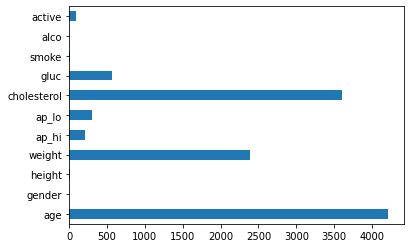

In [19]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [22]:
topper=list(pd.Series(Feature.scores_,index=x.columns).nlargest(7).keys())

In [23]:
x=df[topper]

In [25]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [51]:
Logi=LogisticRegression()
Forest=RandomForestClassifier(n_estimators=325)
Support=SVC(gamma='auto')

In [52]:
Algo_name=[Logi,Forest,Support]
name=['LR','Forest','SVC']

In [53]:
Average=[]
Scores=[]
for i in Algo_name:
  cv_score=cross_val_score(i,Scaled_x,y,cv=2)
  Scores.append(cv_score)
  Average.append(cv_score.mean())

Convert from list to DataFrame

In [54]:
Scores=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Average'])
name=pd.DataFrame(name,columns=['Algorithms'])

Table creation

In [55]:
pd.concat([name,Scores],axis=1)

,Algorithms,0,1
0,LR,0.710343,0.724143
1,Forest,0.687971,0.692057
2,SVC,0.727400,0.728914


In [56]:
Table=pd.concat([name,Scores],axis=1)
pd.concat([Table,Average],axis=1)

,Algorithms,0,1,Average
0,LR,0.710343,0.724143,0.717243
1,Forest,0.687971,0.692057,0.690014
2,SVC,0.727400,0.728914,0.728157


Best detection

In [57]:
Table=pd.concat([Table,Average],axis=1)
Average=list(Table['Average'])

In [60]:
Best=Algo_name[Average.index(max(Average))]

In [61]:
Best.fit(xtrain,ytrain)

SVC(gamma='auto')

In [62]:
Best.score(xtest,ytest)

0.7305714285714285

In [63]:
import pickle as pk

In [67]:
Model=pk.dump(Best,open('My_Model','wb'))

In [68]:
import os
os.getcwd()

'/content'

In [69]:
Scaled_x[1]

array([ 0.30768633,  2.40079294,  0.74983117, -0.39571994, -0.03517999,
        0.07261016,  0.49416711])